# Regression on Pycaret

Imports

In [1]:
import pycaret

In [2]:
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import scipy.stats as sts
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Dataset from zillow api 

* Dataset was cleaned in [EDA.ipynb]('EDA.ipynb')
* cook county IL filtered
* Values = mean price change over time
* index = neighborhoods (cook county IL only!!)
* columns = time = (YYYY/MM/DD) min=2000-01-31 / max=2022-02-28
* in this test we will test `chicago` individially as a beta test and determine the value of continuing with this method

In [3]:
#import dataset
data = pd.read_csv('Resources/cookcounty.csv',index_col='RegionName')

In [4]:
data

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28
RegionName,,,,,,,,,,,,,,,,,,,,,
Chicago,165282.0,165621.0,166381.0,167702.0,169196.0,170566.0,172001.0,173594.0,175129.0,176760.0,...,278732.0,281106.0,283652.0,287049.0,289393.0,291647.0,294440.0,297088.0,299729.0,301283.0
Cicero,128972.0,129220.0,129706.0,130518.0,131517.0,132603.0,133856.0,135013.0,136012.0,137035.0,...,226907.0,229498.0,232578.0,235283.0,237289.0,238760.0,240861.0,243257.0,245957.0,247645.0
Arlington Heights,261429.0,261759.0,262735.0,264406.0,266390.0,267808.0,269428.0,271458.0,273819.0,276055.0,...,390213.0,394921.0,400663.0,405699.0,408596.0,411208.0,414526.0,417568.0,420270.0,421782.0
Schaumburg,206420.0,206899.0,207706.0,208993.0,210318.0,211430.0,213118.0,215316.0,217632.0,219828.0,...,318749.0,322037.0,325884.0,329969.0,332546.0,335233.0,338328.0,341091.0,343829.0,345585.0
Evanston,302592.0,302905.0,303645.0,304993.0,306863.0,308430.0,310211.0,312727.0,316042.0,320664.0,...,502345.0,509733.0,518375.0,526181.0,532433.0,538210.0,544713.0,550440.0,554475.0,556319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Golf,511254.0,512519.0,515788.0,520828.0,524009.0,527693.0,529683.0,535512.0,537426.0,545143.0,...,812506.0,837445.0,865139.0,879458.0,890257.0,898739.0,909127.0,919617.0,929894.0,935990.0
Hodgkins,146250.0,144877.0,145472.0,146342.0,148481.0,149861.0,150805.0,151201.0,152082.0,153320.0,...,289536.0,292275.0,296267.0,299403.0,302809.0,304813.0,307362.0,308740.0,310763.0,311582.0
McCook,164992.0,162667.0,162618.0,162454.0,162897.0,163778.0,164053.0,165607.0,166947.0,168724.0,...,279015.0,282892.0,288192.0,293391.0,297558.0,301130.0,304551.0,307136.0,309673.0,310853.0


In [5]:
from pycaret.regression import *
s = setup(data, 
          target = '2022-02-28',
          session_id=43,
         fix_imbalance = True
         )

,Description,Value
0,session_id,43
1,Target,2022-02-28
2,Original Data,"(120, 266)"
3,Missing Values,True
4,Numeric Features,265
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(83, 0)"


In [6]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,143598.0261,46070174048.7475,197661.2915,-0.2275,0.5430,0.5399,0.3600
dummy,Dummy Regressor,143598.0312,46070175692.8000,197661.2938,-0.2275,0.5430,0.5399,0.0080


In [7]:
print(best)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=43, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [8]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

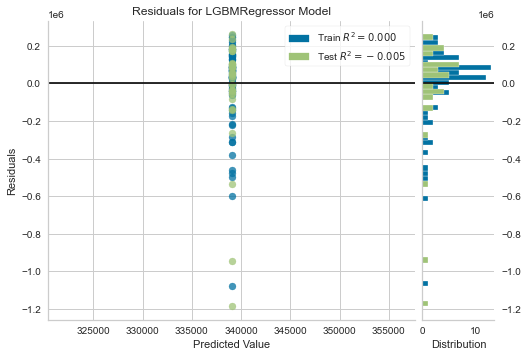

In [9]:
plot_model(best, plot = 'residuals')

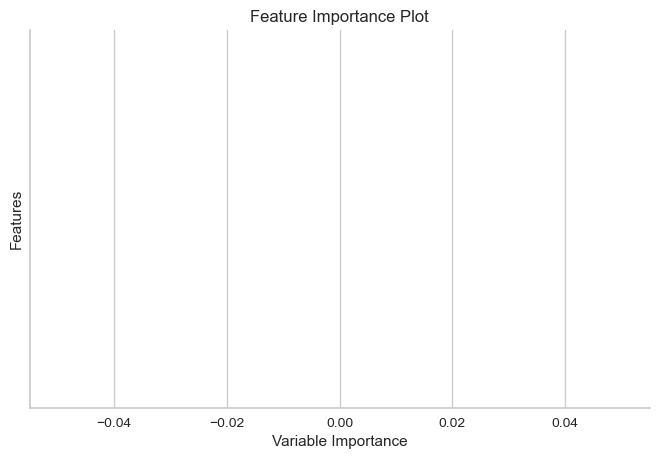

In [10]:
plot_model(best, plot = 'feature')

In [11]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,170405.7040,84842106890.7579,291276.6844,-0.0047,0.6162,0.5776


,2022-02-28,Label
0,234522.0,339042.783133
1,1524629.0,339042.783133
2,245553.0,339042.783133
3,289364.0,339042.783133
4,421782.0,339042.783133
5,144563.0,339042.783133
6,1284407.0,339042.783133
7,396173.0,339042.783133
8,349566.0,339042.783133
9,341724.0,339042.783133


In [12]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,150430.8766,57142151680.0012,239044.2463,-0.0007,0.5735,0.5448


,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,Label
RegionName,,,,,,,,,,,,,,,,,,,,,
Chicago,165282.0,165621.0,166381.0,167702.0,169196.0,170566.0,172001.0,173594.0,175129.0,176760.0,...,281106.0,283652.0,287049.0,289393.0,291647.0,294440.0,297088.0,299729.0,301283.0,339042.783133
Cicero,128972.0,129220.0,129706.0,130518.0,131517.0,132603.0,133856.0,135013.0,136012.0,137035.0,...,229498.0,232578.0,235283.0,237289.0,238760.0,240861.0,243257.0,245957.0,247645.0,339042.783133
Arlington Heights,261429.0,261759.0,262735.0,264406.0,266390.0,267808.0,269428.0,271458.0,273819.0,276055.0,...,394921.0,400663.0,405699.0,408596.0,411208.0,414526.0,417568.0,420270.0,421782.0,339042.783133
Schaumburg,206420.0,206899.0,207706.0,208993.0,210318.0,211430.0,213118.0,215316.0,217632.0,219828.0,...,322037.0,325884.0,329969.0,332546.0,335233.0,338328.0,341091.0,343829.0,345585.0,339042.783133
Evanston,302592.0,302905.0,303645.0,304993.0,306863.0,308430.0,310211.0,312727.0,316042.0,320664.0,...,509733.0,518375.0,526181.0,532433.0,538210.0,544713.0,550440.0,554475.0,556319.0,339042.783133


In [13]:
save_model(best, 'Regression_best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='2022-02-28', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [14]:
loaded_model = load_model('Regression_best_model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='2022-02-28', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                 LGBMRegressor(boosting_type='gbdt', class_weight=None,
                               colsample_bytree=1.0, importance_type='split',
                               learning_rate=0.1, max_depth=-1,
                               min_child_samples=20, min_